In [1]:
!py -m pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 330.3 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/282.6 kB 563.7 kB/s eta 0:00:01
   ------------------------ --------------- 174.1/282.6 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
print("libraries imported..")

C:\Users\hoc13\AppData\Local\Temp\ipykernel_18072\3905055999.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


libraries imported..


In [5]:
df = pd.read_csv("Advertising (1).csv")
df.drop(df.columns[[0]], axis = 1, inplace = True) 
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Задачи: Линейная регрессия
 1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE. 
 Вывести значения коэффициентов модели.
 2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
 максимальной степени полинома. (max_pow <= 10)
 3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома, 
 построить график зависимости максимального модуля параметров, MSE 
 от величины alpha.
 4. Регуляризация. Лассо. Выбрать оптимальную степень полинома, 
 построить график зависимости максимального модуля параметров, MSE 
 от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
 linear_model.Lasso(alpha=0.1)

## 1. LR

### 1,2,3 cols

In [25]:
X123 = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X123, y, test_size=0.2, random_state=42)

In [26]:
X123

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [27]:
model123 = LinearRegression()
model123.fit(X_train, y_train)

LinearRegression()

In [28]:
predictions123 = model123.predict(X_test)
mse123 = mean_squared_error(y_test, predictions123)

In [30]:
print("Модель со всеми столбцами:")
print("Коэффициенты:", model123.coef_)
print("Свободный член (intercept):", model123.intercept_)
print("MSE:", mse123)

Модель со всеми столбцами:
Коэффициенты: [0.04472952 0.18919505 0.00276111]
Свободный член (intercept): 2.979067338122629
MSE: 3.1740973539761033


### 2,3 cols

In [36]:
X23 = df.iloc[:, 1:3]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X23, y, test_size=0.2, random_state=42)

In [37]:
X23

,radio,newspaper
0,37.8,69.2
1,39.3,45.1
2,45.9,69.3
3,41.3,58.5
4,10.8,58.4
...,...,...
195,3.7,13.8
196,4.9,8.1
197,9.3,6.4
198,42.0,66.2


In [38]:
model23 = LinearRegression()
model23.fit(X_train, y_train)

LinearRegression()

In [39]:
predictions23 = model23.predict(X_test)
mse23 = mean_squared_error(y_test, predictions23)

In [40]:
print("Модель со всеми столбцами:")
print("Коэффициенты:", model23.coef_)
print("Свободный член (intercept):", model23.intercept_)
print("MSE:", mse23)

Модель со всеми столбцами:
Коэффициенты: [0.20314733 0.0023628 ]
Свободный член (intercept): 9.382122161900392
MSE: 23.2046437454446


# 2. PolyRegr

In [41]:
from sklearn.preprocessing import PolynomialFeatures

max_pow = 10
mse_values = []
optimal_degree = 0
min_mse = float('inf')

In [47]:
for degree in range(1, max_pow + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X123)  # Преобразование всех столбцов в полиномиальные признаки
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    model_poly = LinearRegression()
    model_poly.fit(X_train, y_train)

    predictions_poly = model_poly.predict(X_test)
    mse_poly = mean_squared_error(y_test, predictions_poly)
    mse_values.append(mse_poly)

    if mse_poly < min_mse:
        min_mse = mse_poly
        optimal_degree = degree

    print(f"  Степень полинома: {degree}")
    # print("Коэффициенты:", model_poly.coef_)
    print("Свободный член (intercept):", model_poly.intercept_)
    print("MSE:", mse_poly)

  Степень полинома: 1
Свободный член (intercept): 2.9790673381226362
MSE: 3.1740973539761077
  Степень полинома: 2
Свободный член (intercept): 4.9390148799893705
MSE: 0.41291022853791315
  Степень полинома: 3
Свободный член (intercept): 3.8011104530592625
MSE: 0.2945684090725803
  Степень полинома: 4
Свободный член (intercept): -20260.59202446807
MSE: 2.152184654135543
  Степень полинома: 5
Свободный член (intercept): 94.24567112146535
MSE: 85.48316493269529
  Степень полинома: 6
Свободный член (intercept): 3.9290400229966433
MSE: 25.037878248172245
  Степень полинома: 7
Свободный член (intercept): 4.626916903456541
MSE: 9774.792355742324
  Степень полинома: 8
Свободный член (intercept): 4.8959645705604995
MSE: 6189198.879558124
  Степень полинома: 9
Свободный член (intercept): 4.87970414010997
MSE: 7503954686.860529
  Степень полинома: 10
Свободный член (intercept): 5.649738461602828
MSE: 227406592593.74762


In [52]:
print("Оптимальная степень ", optimal_degree)

Оптимальная степень  3


# 3. Ridge

In [49]:
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree=optimal_degree)
X_poly = poly.fit_transform(X123)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

alphas = np.logspace(-4, 4, 50)
mse_ridge = []
max_coef_magnitudes = []

In [50]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    predictions_ridge = ridge.predict(X_test)
    mse = mean_squared_error(y_test, predictions_ridge)
    mse_ridge.append(mse)

    max_coef_magnitude = np.max(np.abs(ridge.coef_))
    max_coef_magnitudes.append(max_coef_magnitude)

    print(f"\nAlpha: {alpha}")
    print("Коэффициенты:", ridge.coef_)
    print("Свободный член (intercept):", ridge.intercept_)
    print("MSE:", mse)
    print("Максимальный модуль коэффициента:", max_coef_magnitude)


Alpha: 0.0001
Коэффициенты: [ 0.00000000e+00  9.18398718e-02  1.07920220e-02  2.45105170e-02
 -4.37012311e-04  1.35341105e-03 -3.06406338e-04  1.73582393e-04
  6.94903900e-04 -3.67616705e-05  7.37272561e-07 -1.05884481e-06
  8.63683254e-07  2.70330095e-06 -3.41844414e-06  9.83476942e-07
 -7.66662733e-06 -1.20388079e-06 -2.35559612e-06 -1.48000094e-06]
Свободный член (intercept): 3.8011105708333446
MSE: 0.2945684088872137
Максимальный модуль коэффициента: 0.09183987175334046

Alpha: 0.00014563484775012445
Коэффициенты: [ 0.00000000e+00  9.18398712e-02  1.07920193e-02  2.45105151e-02
 -4.37012308e-04  1.35341106e-03 -3.06406333e-04  1.73582447e-04
  6.94903955e-04 -3.67616499e-05  7.37272557e-07 -1.05884483e-06
  8.63683252e-07  2.70330087e-06 -3.41844421e-06  9.83476927e-07
 -7.66662774e-06 -1.20388115e-06 -2.35559650e-06 -1.48000098e-06]
Свободный член (intercept): 3.801110624671784
MSE: 0.2945684087916932
Максимальный модуль коэффициента: 0.09183987119336771

Alpha: 0.000212095088792

C:\Users\hoc13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.79908e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\hoc13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.42709e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\hoc13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.07834e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\hoc13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.02678e-20): result may not be accurate.
  return linalg.solve

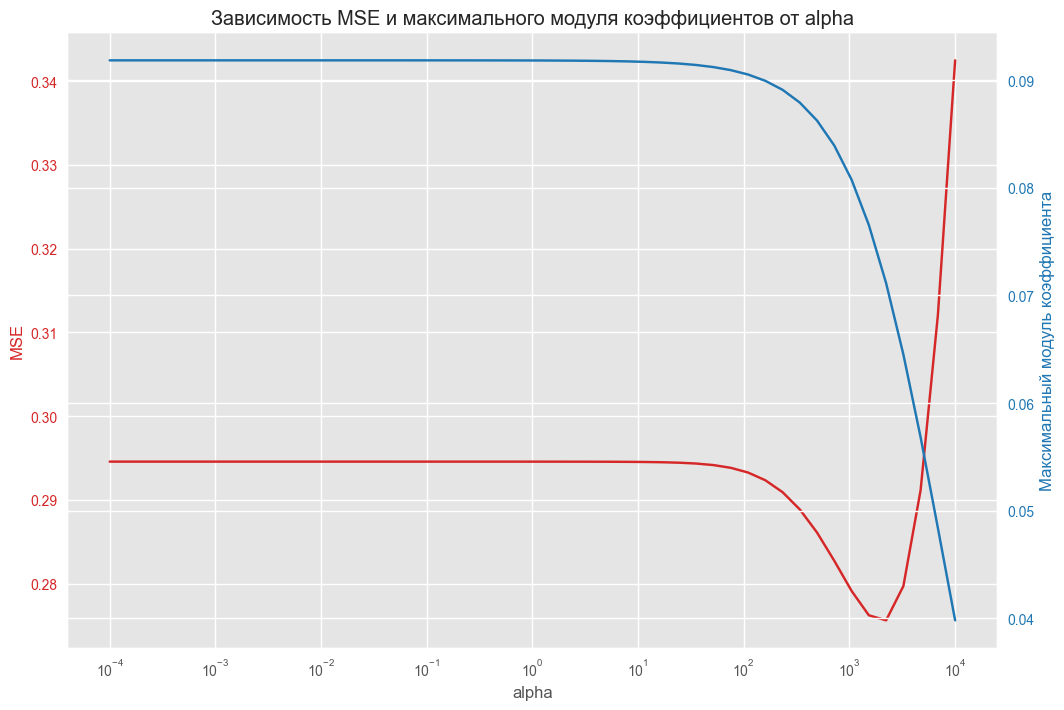

In [53]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('alpha')
ax1.set_ylabel('MSE', color=color)
ax1.semilogx(alphas, mse_ridge, color=color, label='MSE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Максимальный модуль коэффициента', color=color)
ax2.semilogx(alphas, max_coef_magnitudes, color=color, label='Максимальный модуль коэффициента')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Зависимость MSE и максимального модуля коэффициентов от alpha')
plt.show()

# 4. Lasso

In [55]:
from sklearn.linear_model import Lasso

poly = PolynomialFeatures(degree=optimal_degree)
X_poly = poly.fit_transform(X123)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

alphas = np.logspace(-4, 4, 50)
mse_lasso = []
max_coef_magnitudes = []

In [56]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)

    predictions_lasso = lasso.predict(X_test)
    mse = mean_squared_error(y_test, predictions_lasso)
    mse_lasso.append(mse)

    max_coef_magnitude = np.max(np.abs(lasso.coef_))
    max_coef_magnitudes.append(max_coef_magnitude)

    print(f"\nAlpha: {alpha}")
    print("Коэффициенты:", lasso.coef_)
    print("Свободный член (intercept):", lasso.intercept_)
    print("MSE:", mse)
    print("Максимальный модуль коэффициента:", max_coef_magnitude)

C:\Users\hoc13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.728e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hoc13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.728e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hoc13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca


Alpha: 0.0001
Коэффициенты: [ 0.00000000e+00  9.18355081e-02  1.07138815e-02  2.44858980e-02
 -4.37006642e-04  1.35366779e-03 -3.06357478e-04  1.75716720e-04
  6.95947514e-04 -3.65105073e-05  7.37277424e-07 -1.05910138e-06
  8.63732292e-07  2.70015982e-06 -3.41939687e-06  9.83066918e-07
 -7.68430476e-06 -1.21373004e-06 -2.36187871e-06 -1.47997415e-06]
Свободный член (intercept): 3.8019238517211793
MSE: 0.29458467097012403
Максимальный модуль коэффициента: 0.09183550809444313

Alpha: 0.00014563484775012445
Коэффициенты: [ 0.00000000e+00  9.18343653e-02  1.06794846e-02  2.44727152e-02
 -4.37007480e-04  1.35376960e-03 -3.06350443e-04  1.76633402e-04
  6.96492014e-04 -3.63320884e-05  7.37283576e-07 -1.05919553e-06
  8.63790061e-07  2.69885771e-06 -3.41979982e-06  9.82930632e-07
 -7.69160811e-06 -1.21871485e-06 -2.36554257e-06 -1.48034359e-06]
Свободный член (intercept): 3.8022732967329738
MSE: 0.2946019436778653
Максимальный модуль коэффициента: 0.09183436530193767

Alpha: 0.0002120950887

C:\Users\hoc13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.708e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hoc13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.705e+01, tolerance: 4.150e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hoc13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca


Alpha: 0.0029470517025518097
Коэффициенты: [ 0.00000000e+00  9.17642154e-02  8.56845992e-03  2.36635986e-02
 -4.37058786e-04  1.36001879e-03 -3.05919490e-04  2.32889942e-04
  7.29906889e-04 -2.53785521e-05  7.37660797e-07 -1.06497642e-06
  8.67337411e-07  2.61893317e-06 -3.44452329e-06  9.74567829e-07
 -8.13978437e-06 -1.52460470e-06 -2.59041439e-06 -1.50304174e-06]
Свободный член (intercept): 3.8237206658602325
MSE: 0.2956791917312758
Максимальный модуль коэффициента: 0.09176421542730669

Alpha: 0.004291934260128779
Коэффициенты: [ 0.00000000e+00  9.17305356e-02  7.55531466e-03  2.32752588e-02
 -4.37083316e-04  1.36301866e-03 -3.05713059e-04  2.59887824e-04
  7.45941770e-04 -2.01199478e-05  7.37841638e-07 -1.06775245e-06
  8.69040834e-07  2.58056814e-06 -3.45638493e-06  9.70554846e-07
 -8.35485228e-06 -1.67138309e-06 -2.69833899e-06 -1.51394765e-06]
Свободный член (intercept): 3.8340145849763836
MSE: 0.2962081169123373
Максимальный модуль коэффициента: 0.09173053561353885

Alpha: 0.0

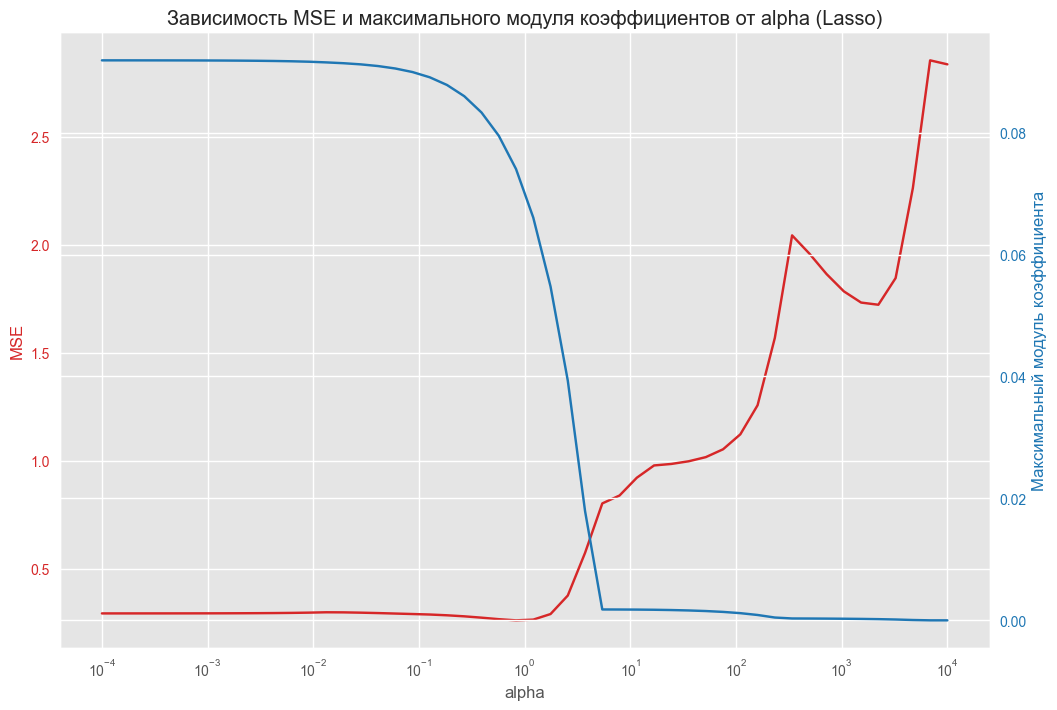

In [57]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('alpha')
ax1.set_ylabel('MSE', color=color)
ax1.semilogx(alphas, mse_lasso, color=color, label='MSE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Максимальный модуль коэффициента', color=color)
ax2.semilogx(alphas, max_coef_magnitudes, color=color, label='Максимальный модуль коэффициента')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Зависимость MSE и максимального модуля коэффициентов от alpha (Lasso)')
plt.show()

# SVR
 https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
 Исследовать точность модели регрессии при применении  ядерных функций 'poly', 'sigmoid'
 Реализовать модель SVRб учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.

In [58]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

X = X123
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Poly kernel

In [59]:
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'degree': [1, 2, 3, 4, 5]
}

svr_poly = SVR(kernel='poly')
grid_search_poly = GridSearchCV(svr_poly, param_grid_poly, cv=5)
grid_search_poly.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [1, 2, 3, 4, 5],
                         'epsilon': [0.01, 0.1, 1]})

In [60]:
best_model_poly = grid_search_poly.best_estimator_
y_pred_poly = best_model_poly.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("Полиномиальная модель:")
print("Лучшие параметры:", grid_search_poly.best_params_)
print("Mean Squared Error (MSE):", mse_poly)

Полиномиальная модель:
Лучшие параметры: {'C': 10, 'degree': 2, 'epsilon': 1}
Mean Squared Error (MSE): 1.0719186427991962


### Sigmoid kernel

In [61]:
param_grid_sigmoid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1]
}

svr_sigmoid = SVR(kernel='sigmoid')
grid_search_sigmoid = GridSearchCV(svr_sigmoid, param_grid_sigmoid, cv=5)
grid_search_sigmoid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVR(kernel='sigmoid'),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1]})

In [62]:
best_model_sigmoid = grid_search_sigmoid.best_estimator_
y_pred_sigmoid = best_model_sigmoid.predict(X_test)
mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)

print("\nСигмоидная модель:")
print("Лучшие параметры:", grid_search_sigmoid.best_params_)
print("Mean Squared Error (MSE):", mse_sigmoid)


Сигмоидная модель:
Лучшие параметры: {'C': 0.1, 'epsilon': 1}
Mean Squared Error (MSE): 26.74737533272774


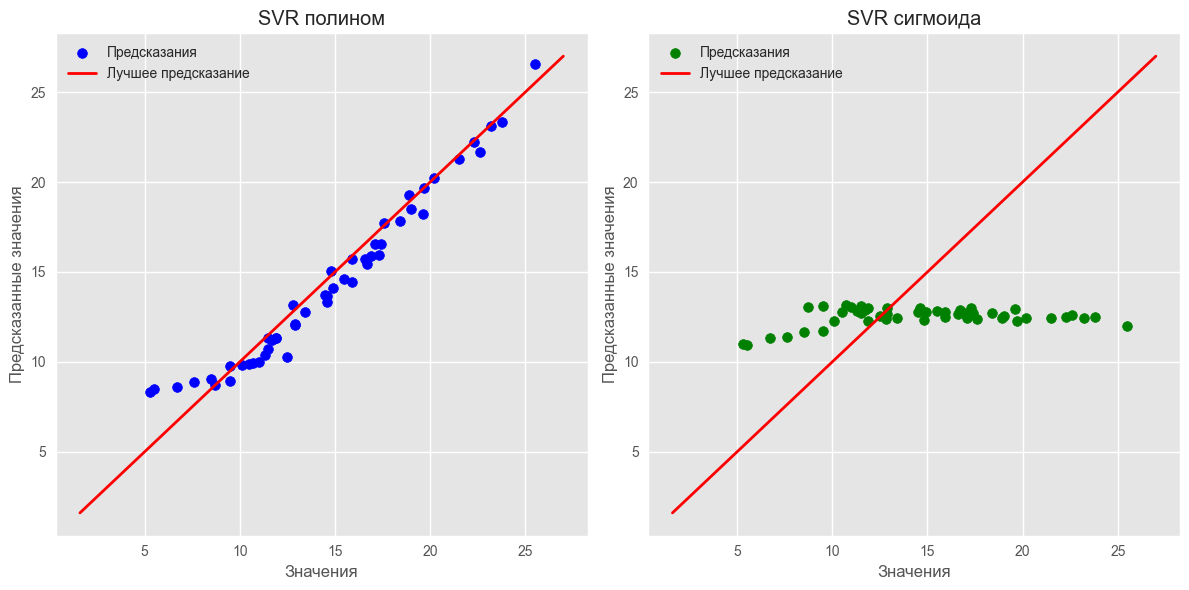

In [76]:
plt.figure(figsize=(12, 6))

# Полиномиальная модель
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_poly, color='blue', label='Предсказания')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Лучшее предсказание')
plt.title('SVR полином')
plt.xlabel('Значения')
plt.ylabel('Предсказанные значения')
plt.legend()

# Сигмоидная модель
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sigmoid, color='green', label='Предсказания')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Лучшее предсказание')
plt.title('SVR сигмоида')
plt.xlabel('Значения')
plt.ylabel('Предсказанные значения')
plt.legend()

plt.tight_layout()
plt.show()